In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with= engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

recent_date

('2017-08-23',)

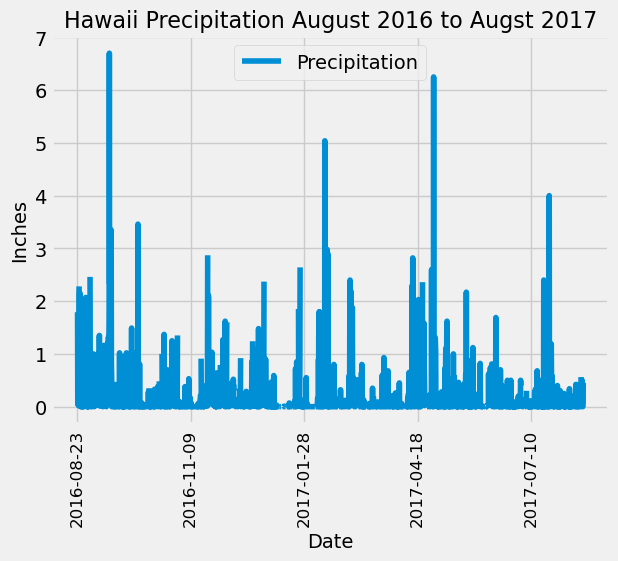

<Figure size 1000x1000 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
p_year = dt.date(2017,8,23)- dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

prec_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= p_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(prec_data, columns = ('Date', 'Precipitation'))

# Sort the dataframe by date
prec_df.set_index("Date", inplace = True)
sorted_prec_df = prec_df.sort_index()



# Use Pandas Plotting with Matplotlib to plot the data
sorted_prec_df.plot()
plt.xlabel("Date", size = 14)
plt.ylabel("Inches", size = 14)
plt.title("Hawaii Precipitation August 2016 to Augst 2017", size = 16)
plt.xticks(rotation = 90, size = 12)
plt.figure(figsize = (10,10))
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

prec_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count =  session.query(func.count(station.station)).scalar()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station,func.count(measurement.station))\
                    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
active_station_data = session.query(*sel).filter(measurement.station == 'USC00519281').all()
active_station_data

[(54.0, 85.0, 71.66378066378067)]

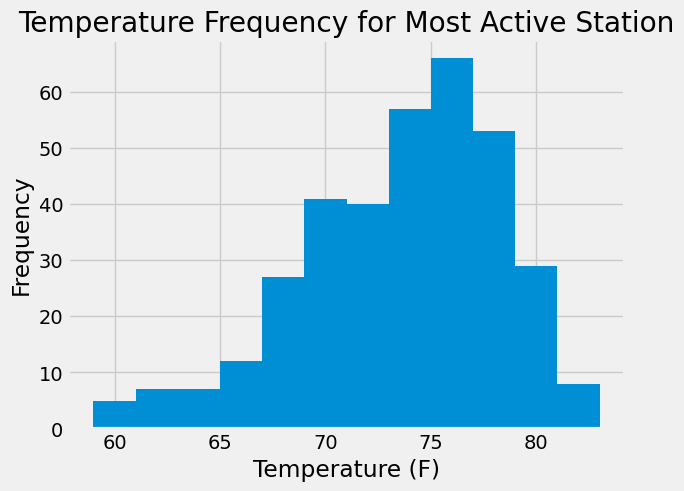

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_active_station = session.query(measurement.tobs).filter(measurement.station == 'USC00519281')\
                    .filter(measurement.date >= p_year).all()

temp = [x[0] for x in year_active_station]

plt.hist(temp, bins = 12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Frequency for Most Active Station')
plt.show()





# Close Session

In [20]:
# Close Session
session.close()
